In [ ]:
Revisemos la versión de pandas

In [71]:
print(pd.__version__)


2.2.2


# Fundamentos del lenguaje

In [ ]:
## Dicionarios

In [88]:
persona = {
    "nombre": "Juan",
    "edad": 30,
    "ciudad": "Bogotá"
}

In [89]:
print(persona["nombre"])  
print(persona.get("edad"))

Juan
30


In [92]:
print(persona.get("equipo_futbol", "No tiene equipo"))
#print(persona.get("equipo_futbol"))

No tiene equipo


In [93]:
persona["profesion"] = "Ingeniero"  # Agregar nueva clave-valor
persona["edad"] = 31  # Modificar valor existente

print(persona)
# {'nombre': 'Juan', 'edad': 31, 'ciudad': 'Bogotá', 'profesion': 'Ingeniero'}


{'nombre': 'Juan', 'edad': 31, 'ciudad': 'Bogotá', 'profesion': 'Ingeniero'}


In [ ]:
del persona["ciudad"]  # Elimina una clave específica
print(persona)  # {'nombre': 'Juan', 'edad': 31, 'profesion': 'Ingeniero'}

{'nombre': 'Juan', 'edad': 31, 'profesion': 'Ingeniero'}


In [ ]:
edad = persona.pop("edad")  # Extrae el valor y lo elimina
print(edad)  #  31
#print(persona)  # {'nombre': 'Juan', 'profesion': 'Ingeniero'}


31


In [96]:
persona

{'nombre': 'Juan', 'profesion': 'Ingeniero'}

In [97]:
for clave in persona:
    print(clave)

nombre
profesion


In [98]:
for valor in persona.values():
    print(valor)

Juan
Ingeniero


In [99]:
for clave, valor in persona.items():
    print(f"{clave}: {valor}")

nombre: Juan
profesion: Ingeniero


In [100]:
persona_invertida = {valor + valor: clave for clave, valor in persona.items()}
print(persona_invertida)  

{'JuanJuan': 'nombre', 'IngenieroIngeniero': 'profesion'}


In [ ]:
# Número de letras
long_personas = {clave: len(valor) for clave, valor in persona.items()}
long_personas

{'nombre': 4, 'profesion': 9}

Manejo de fechas

In [23]:
from datetime import datetime, date, timedelta
fecha1 = date(2024, 1, 14)
fecha2 = datetime.strptime("14-01-2024", "%d-%m-%Y").date() 
print(fecha1)
print(fecha2)


2024-01-14
2024-01-14


In [24]:
fecha1  + timedelta(days=30*12)

datetime.date(2025, 1, 8)

# Fecha y hora

In [33]:
from datetime import datetime
import pytz

bogota_tz = pytz.timezone("America/Bogota")
fecha_hora = datetime(2024, 1, 14, 17, 45)  # Crear sin zona horaria
fecha_hora_bogota = bogota_tz.localize(fecha_hora)  # Asignar correctamente

print(fecha_hora_bogota)  # 2024-01-14 17:45:00-05:00 ✅

2024-01-14 17:45:00-05:00


# Análisis de datos

In [87]:

import numpy as np
import pandas as pd


    Algunas de las variables, tenures: número de meses que ha tenido el servicio

In [34]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [35]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # Coerce invalid values to NaN


# Recodificación en percentiles (cuartiles, deciles, etc):

Para efectos de visualización puede ser muy interesante evaluar si existe una relación entre la deserción y la permanencia, para eso crearemos una variable recategorizada, creamos 4 clases:
- min - P25
- p25 - p50
- p50 - p75
- p75 max

In [ ]:
bins = np.quantile(df['TotalCharges'], np.linspace(0, 1, 5))
print(bins)

array([nan, nan, nan, nan, nan])

¿Por que pasa lo anterior?, por que hay 11 valores faltantes:

In [48]:
df['TotalCharges'].isna().sum()

11

In [47]:
bins = np.quantile(df['TotalCharges'].dropna(), np.linspace(0, 1, 5))
print(bins)

[  18.8     401.45   1397.475  3794.7375 8684.8   ]


In [50]:
# Compute quantile-based bins

df['TotalChargesR'] = pd.cut(df['TotalCharges'] , bins=bins, labels=[1, 2, 3, 4], 
include_lowest=True, right=False)
# Verificamos la cantidad:
print(df['TotalChargesR'].value_counts())

TotalChargesR
1    1758
2    1758
3    1758
4    1757
Name: count, dtype: int64


In [54]:
df.groupby('TotalChargesR')['Churn'].apply(lambda x: (x == 'Yes').mean()).reset_index()

<positron-console-cell-54>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


,TotalChargesR,Churn
0,1,0.434585
1,2,0.253129
2,3,0.230375
3,4,0.144565


In [64]:
# Calcular proporción de desertores en cada cuartil
df_summary = df.groupby('TotalChargesR')['Churn'].apply(lambda x: (x == 'Yes').mean()).reset_index()
df_summary.columns = ['Quartile', 'ChurnRate']

<positron-console-cell-64>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


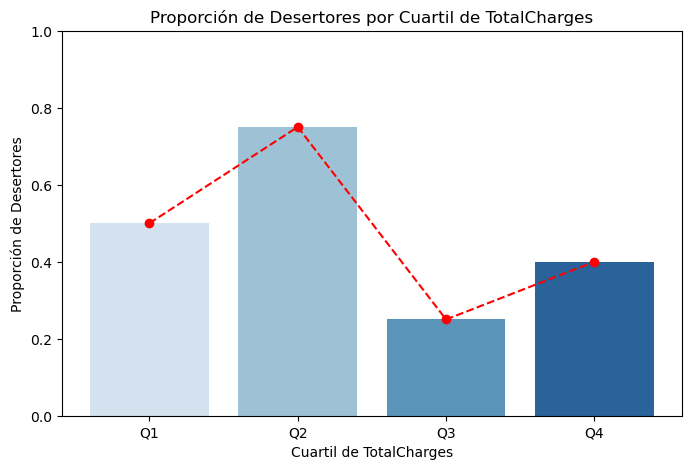

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Datos de ejemplo
df_summary = pd.DataFrame({
    'Quartile': ['Q1', 'Q2', 'Q3', 'Q4'],
    'ChurnRate': [0.50, 0.75, 0.25, 0.40]
})

# Graficar
plt.figure(figsize=(8, 5))

# Gráfico de barras corregido
sns.barplot(data=df_summary, x='Quartile', y='ChurnRate', hue='Quartile', palette='Blues', legend=False)

# Línea de tendencia con plt.plot()
x = range(len(df_summary))  # Índices de los cuartiles
y = df_summary['ChurnRate']
plt.plot(x, y, color='red', linestyle='dashed', marker='o', markersize=6)

# Configuración del gráfico
plt.title("Proporción de Desertores por Cuartil de TotalCharges")
plt.xlabel("Cuartil de TotalCharges")
plt.ylabel("Proporción de Desertores")
plt.ylim(0, 1)
plt.xticks(x, df_summary['Quartile'])
plt.show()


In [65]:
# Análisis de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   object  
 4   Dependents        7043 non-null   object  
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

In [68]:
df['Churn'].apply(type)

0       <class 'str'>
1       <class 'str'>
2       <class 'str'>
3       <class 'str'>
4       <class 'str'>
            ...      
7038    <class 'str'>
7039    <class 'str'>
7040    <class 'str'>
7041    <class 'str'>
7042    <class 'str'>
Name: Churn, Length: 7043, dtype: object

In [69]:
for col in df.columns:
    print(f"\nColumna: {col}")
    print(df[col].apply(type).value_counts())


Columna: customerID
customerID
<class 'str'>    7043
Name: count, dtype: int64

Columna: gender
gender
<class 'str'>    7043
Name: count, dtype: int64

Columna: SeniorCitizen
SeniorCitizen
<class 'int'>    7043
Name: count, dtype: int64

Columna: Partner
Partner
<class 'str'>    7043
Name: count, dtype: int64

Columna: Dependents
Dependents
<class 'str'>    7043
Name: count, dtype: int64

Columna: tenure
tenure
<class 'int'>    7043
Name: count, dtype: int64

Columna: PhoneService
PhoneService
<class 'str'>    7043
Name: count, dtype: int64

Columna: MultipleLines
MultipleLines
<class 'str'>    7043
Name: count, dtype: int64

Columna: InternetService
InternetService
<class 'str'>    7043
Name: count, dtype: int64

Columna: OnlineSecurity
OnlineSecurity
<class 'str'>    7043
Name: count, dtype: int64

Columna: OnlineBackup
OnlineBackup
<class 'str'>    7043
Name: count, dtype: int64

Columna: DeviceProtection
DeviceProtection
<class 'str'>    7043
Name: count, dtype: int64

Columna: Te

Revisemos las columnas que tienen un faltante

In [70]:
for col in df.columns:
    print(f"Columna: {col} - Faltantes: {df[col].isna().sum()}")


Columna: customerID - Faltantes: 0
Columna: gender - Faltantes: 0
Columna: SeniorCitizen - Faltantes: 0
Columna: Partner - Faltantes: 0
Columna: Dependents - Faltantes: 0
Columna: tenure - Faltantes: 0
Columna: PhoneService - Faltantes: 0
Columna: MultipleLines - Faltantes: 0
Columna: InternetService - Faltantes: 0
Columna: OnlineSecurity - Faltantes: 0
Columna: OnlineBackup - Faltantes: 0
Columna: DeviceProtection - Faltantes: 0
Columna: TechSupport - Faltantes: 0
Columna: StreamingTV - Faltantes: 0
Columna: StreamingMovies - Faltantes: 0
Columna: Contract - Faltantes: 0
Columna: PaperlessBilling - Faltantes: 0
Columna: PaymentMethod - Faltantes: 0
Columna: MonthlyCharges - Faltantes: 0
Columna: TotalCharges - Faltantes: 11
Columna: Churn - Faltantes: 0
Columna: TotalChargesR - Faltantes: 12


Analizamos las variables continuas:

In [74]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Sacar las variables categóricas:

In [76]:
df.describe(include='object')


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [ ]:
#pip install pandas-profiling
#pip install dataprep


SyntaxError: invalid syntax (432288177.py, line 2)